In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import face_recognition
import keras
from keras.models import load_model
import cv2

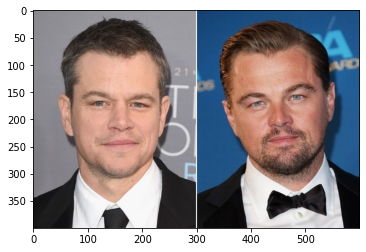

In [3]:
image1 = Image.open("test_images/test_image.jpg")
image_array1 = np.array(image1)
plt.imshow(image_array1)

In [4]:
image = face_recognition.load_image_file("test_images/test_image.jpg")
face_locations = face_recognition.face_locations(image)

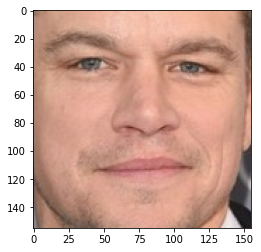

In [5]:
top, right, bottom, left = face_locations[0]
face_image1 = image[top:bottom, left:right]
plt.imshow(face_image1)
image_save = Image.fromarray(face_image1)
image_save.save("test_images/image_1.jpg")

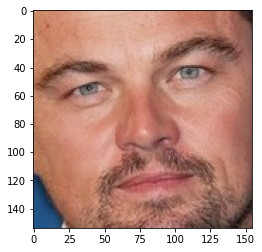

In [6]:
top, right, bottom, left = face_locations[1]
face_image2 = image[top:bottom, left:right]
plt.imshow(face_image2)
image_save = Image.fromarray(face_image2)
image_save.save("test_images/image_2.jpg")

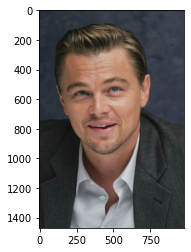

In [7]:
image1 = Image.open("test_images/ldc_pose1.jpg")
image_array1 = np.array(image1)
plt.imshow(image_array1)

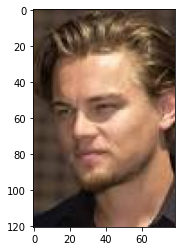

In [8]:
image2 = Image.open("test_images/ldc_pose2.jpeg")
image_array2 = np.array(image2)
plt.imshow(image_array2)

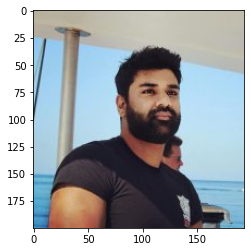

In [9]:
image3 = Image.open("test_images/random_person.jpg")
image_array3 = np.array(image3)
plt.imshow(image_array3)

In [10]:
image1 = face_recognition.load_image_file("test_images/ldc_pose1.jpg")
image2 = face_recognition.load_image_file("test_images/ldc_pose2.jpeg")
 
encoding_1 = face_recognition.face_encodings(image1)[0]

encoding_2 = face_recognition.face_encodings(image1)[0]

results = face_recognition.compare_faces([encoding_1], encoding_2, tolerance=0.50)

In [ ]:
results

[True]

In [11]:
image1 = face_recognition.load_image_file("test_images/ldc_pose1.jpg")
image2 = face_recognition.load_image_file("test_images/random_person.jpg")
 
encoding_1 = face_recognition.face_encodings(image1)[0]

encoding_2 = face_recognition.face_encodings(image2)[0]

results = face_recognition.compare_faces([encoding_1], encoding_2,tolerance=0.50)

In [12]:
results

[False]

In [13]:
emotion_dict= {'Angry': 0, 'Sad': 5, 'Neutral': 4, 'Disgust': 1, 'Surprise': 6, 'Fear': 2, 'Happy': 3}

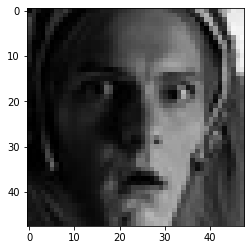

In [14]:
face_image  = cv2.imread("test_images/surprise.jpg")
plt.imshow(face_image)

In [15]:
face_image = cv2.resize(face_image, (48,48))
face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 1])

In [16]:
model = load_model("model_v6_23.hdf5")

In [17]:
predicted_class = np.argmax(model.predict(face_image))

In [18]:
label_map = dict((v,k) for k,v in emotion_dict.items()) 
predicted_label = label_map[predicted_class]

In [19]:
predicted_label

'Surprise'